In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("="*80)
print("🗺️  SEASONAL HEATFLOW & TOURIST MOVEMENT SIMULATION")
print("="*80)

# Load datasets
festivals_df = pd.read_csv('E:\\FDVA\\data\\processed\\festivals_processed.csv')
cost_df = pd.read_csv('E:\\FDVA\\data\\processed\\cost_processed.csv')
tourist_df = pd.read_csv('E:\\FDVA\\data\\processed\\tourist_processed.csv')

# Strip whitespace from column names
festivals_df.columns = festivals_df.columns.str.strip()
cost_df.columns = cost_df.columns.str.strip()
tourist_df.columns = tourist_df.columns.str.strip()

print("\n✅ Datasets loaded successfully!")
print(f"   Festivals: {len(festivals_df)} records")
print(f"   Cost Data: {len(cost_df)} countries")
print(f"   Tourist Data: {len(tourist_df)} records")

🗺️  SEASONAL HEATFLOW & TOURIST MOVEMENT SIMULATION

✅ Datasets loaded successfully!
   Festivals: 500 records
   Cost Data: 121 countries
   Tourist Data: 8253 records


In [3]:
# ============================================================================
# PART 1: SIMULATE TOURIST MOVEMENT INTENSITY
# ============================================================================

def simulate_tourist_intensity(festivals_df, cost_df):
    """
    Simulate tourist movement intensity based on:
    - Festival impact scores
    - Season
    - Cost of living (inverse relationship)
    """
    
    # Merge datasets
    merged = festivals_df.merge(cost_df, on='Country', how='left')
    
    # Calculate intensity score
    # Higher festival impact + Lower cost = Higher tourist intensity
    merged['Tourist_Intensity'] = merged['Impact_Score'] * 100
    
    # Adjust for cost (countries with lower cost get bonus)
    if 'Cost of Living Index' in merged.columns:
        # Normalize cost (inverse: lower cost = higher multiplier)
        max_cost = merged['Cost of Living Index'].max()
        merged['Cost_Factor'] = (max_cost - merged['Cost of Living Index']) / max_cost
        merged['Cost_Factor'] = merged['Cost_Factor'].fillna(0.5)
        merged['Tourist_Intensity'] = merged['Tourist_Intensity'] * (1 + merged['Cost_Factor'])
    
    return merged

print("\n🔄 Simulating tourist movement patterns...")
tourist_intensity = simulate_tourist_intensity(festivals_df, cost_df)



🔄 Simulating tourist movement patterns...


📊 Creating Visualization 5: Impact Score Distribution...
📊 Creating Visualization 8: Seasonal Transition Matrix...
📊 Creating Visualization 9: Top Destinations Ranking...

✅ Visualization saved as 'seasonal_heatflow_analysis.png'


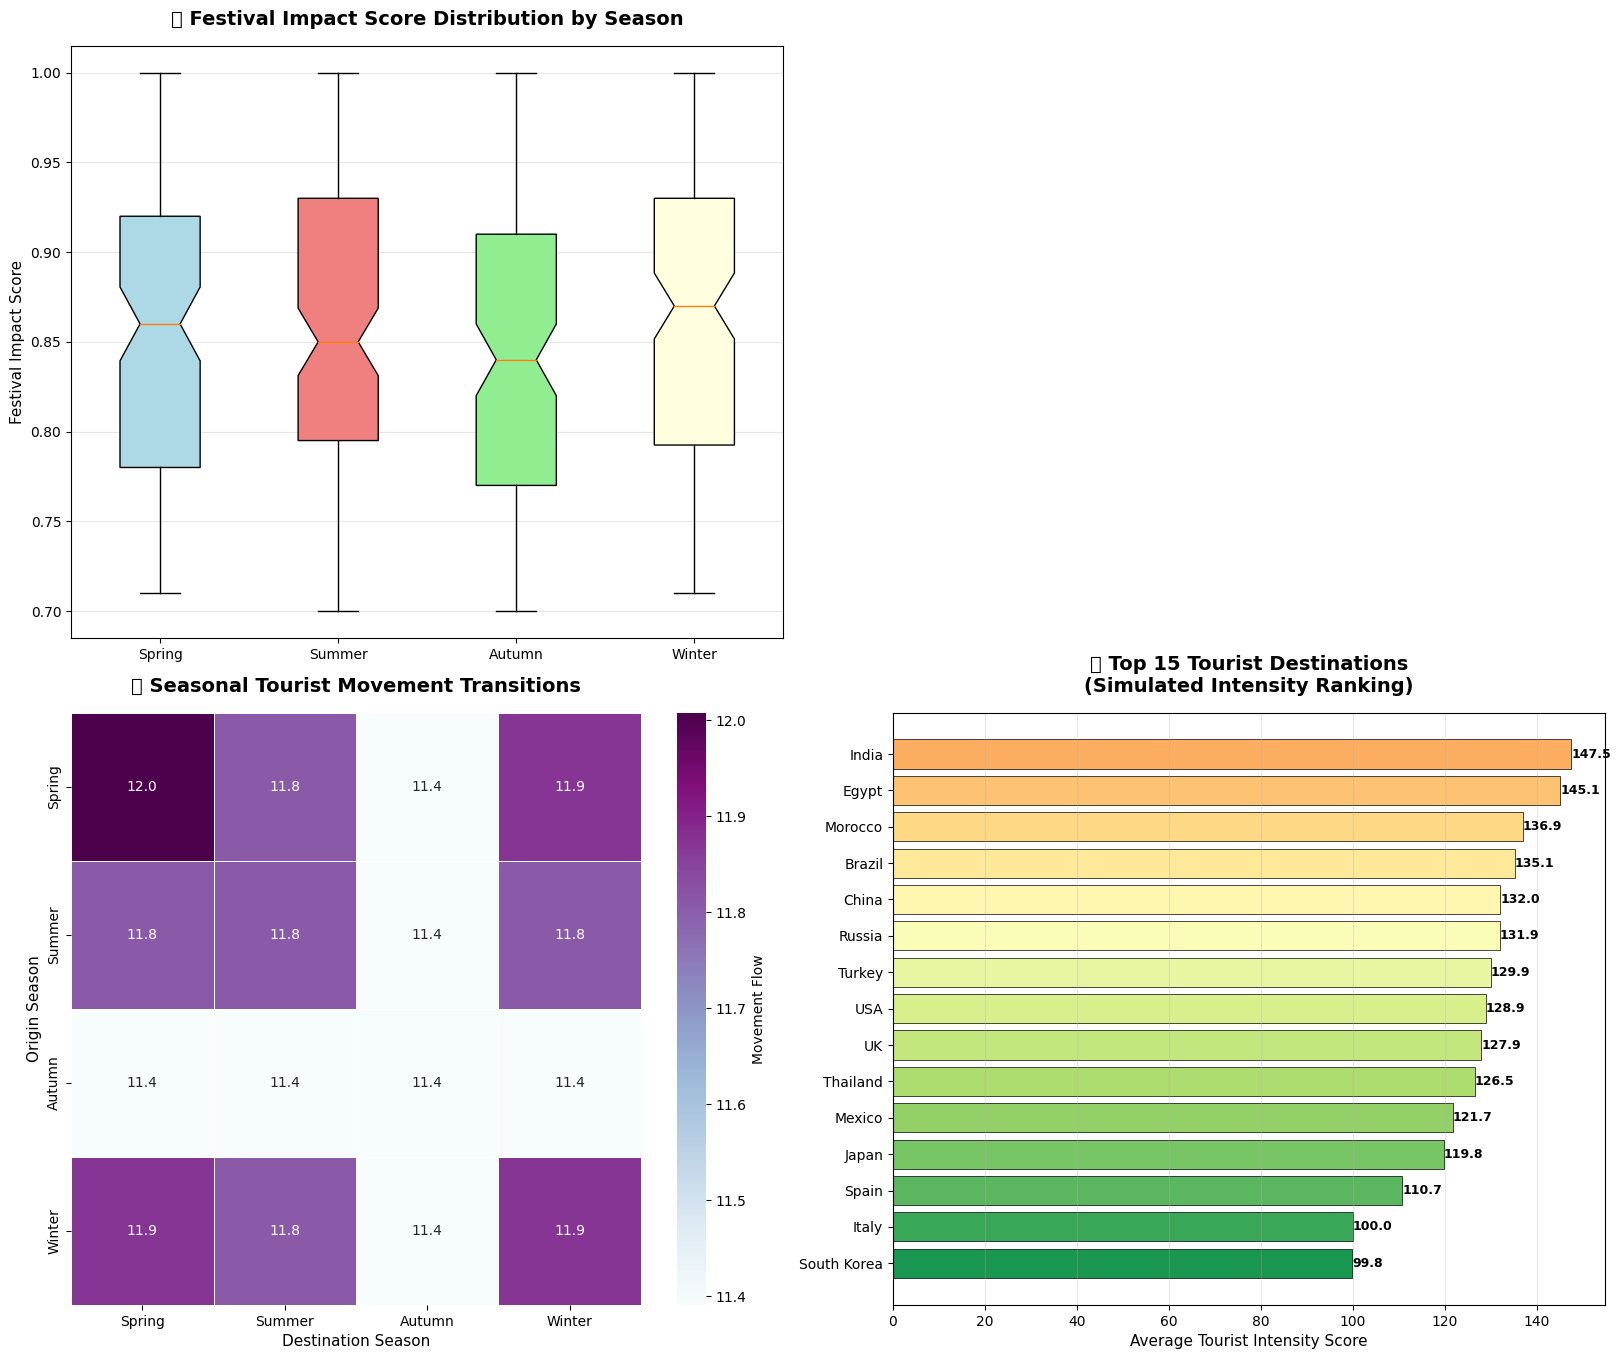

In [4]:
# ============================================================================
# CREATE VISUALIZATION CANVAS
# ============================================================================

fig = plt.figure(figsize=(24, 20))
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# ============================================================================
# 1. IMPACT SCORE DISTRIBUTION ACROSS SEASONS
# ============================================================================
print("📊 Creating Visualization 5: Impact Score Distribution...")

ax5 = plt.subplot(3, 3, 5)

season_data = []
for season in season_order:
    if season in tourist_intensity['Season'].values:
        season_data.append(tourist_intensity[tourist_intensity['Season'] == season]['Impact_Score'].values)

bp = ax5.boxplot(season_data, labels=[s for s in season_order if s in tourist_intensity['Season'].unique()],
                  patch_artist=True, notch=True)

colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax5.set_ylabel('Festival Impact Score', fontsize=11)
ax5.set_title('📊 Festival Impact Score Distribution by Season', 
              fontsize=14, fontweight='bold', pad=15)
ax5.grid(axis='y', alpha=0.3)

# ============================================================================
# 2. SEASONAL MOVEMENT TRANSITIONS (Chord-like Visualization)
# ============================================================================
print("📊 Creating Visualization 8: Seasonal Transition Matrix...")

ax8 = plt.subplot(3, 3, 8)

# Create transition matrix
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
transition_matrix = np.zeros((4, 4))

for i, season_from in enumerate(seasons):
    for j, season_to in enumerate(seasons):
        # Simulate transitions based on intensity similarity
        from_intensity = tourist_intensity[tourist_intensity['Season'] == season_from]['Tourist_Intensity'].mean()
        to_intensity = tourist_intensity[tourist_intensity['Season'] == season_to]['Tourist_Intensity'].mean()
        transition_matrix[i, j] = min(from_intensity, to_intensity) / 10

sns.heatmap(transition_matrix, annot=True, fmt='.1f', cmap='BuPu',
            xticklabels=seasons, yticklabels=seasons, ax=ax8,
            cbar_kws={'label': 'Movement Flow'}, linewidths=0.5)
ax8.set_title('🔄 Seasonal Tourist Movement Transitions', 
              fontsize=14, fontweight='bold', pad=15)
ax8.set_xlabel('Destination Season', fontsize=11)
ax8.set_ylabel('Origin Season', fontsize=11)

# ============================================================================
# 3. TOP DESTINATIONS RANKING
# ============================================================================
print("📊 Creating Visualization 9: Top Destinations Ranking...")

ax9 = plt.subplot(3, 3, 9)

top_destinations = tourist_intensity.groupby('Country')['Tourist_Intensity'].mean().nlargest(15)

colors_gradient = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_destinations)))
bars = ax9.barh(range(len(top_destinations)), top_destinations.values, color=colors_gradient,
                edgecolor='black', linewidth=0.5)

ax9.set_yticks(range(len(top_destinations)))
ax9.set_yticklabels(top_destinations.index)
ax9.set_xlabel('Average Tourist Intensity Score', fontsize=11)
ax9.set_title('🏆 Top 15 Tourist Destinations\n(Simulated Intensity Ranking)', 
              fontsize=14, fontweight='bold', pad=15)
ax9.invert_yaxis()

# Add values on bars
for i, (bar, value) in enumerate(zip(bars, top_destinations.values)):
    ax9.text(value, bar.get_y() + bar.get_height()/2, f'{value:.1f}',
             ha='left', va='center', fontsize=9, fontweight='bold')

ax9.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('E:\\FDVA\\visuals\\seasonal_heatflow_analysis.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualization saved as 'seasonal_heatflow_analysis.png'")
plt.show()


In [5]:
# ============================================================================
# STATISTICAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("📈 SEASONAL HEATFLOW ANALYSIS SUMMARY")
print("="*80)

print("\n🌍 OVERALL STATISTICS:")
print(f"   Total Countries Analyzed: {tourist_intensity['Country'].nunique()}")
print(f"   Total Festivals: {len(tourist_intensity)}")
print(f"   Average Tourist Intensity: {tourist_intensity['Tourist_Intensity'].mean():.2f}")
print(f"   Peak Intensity: {tourist_intensity['Tourist_Intensity'].max():.2f}")

print("\n🌺 SEASONAL BREAKDOWN:")
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    if season in tourist_intensity['Season'].values:
        avg_intensity = tourist_intensity[tourist_intensity['Season'] == season]['Tourist_Intensity'].mean()
        count = len(tourist_intensity[tourist_intensity['Season'] == season])
        print(f"   {season:8s}: {count:3d} festivals | Avg Intensity: {avg_intensity:6.2f}")

print("\n🏆 TOP 5 DESTINATIONS:")
top_5 = tourist_intensity.groupby('Country')['Tourist_Intensity'].mean().nlargest(5)
for i, (country, intensity) in enumerate(top_5.items(), 1):
    print(f"   {i}. {country:20s} - Intensity: {intensity:.2f}")

print("\n🎭 TOP FESTIVAL CATEGORIES:")
top_categories = tourist_intensity.groupby('Category')['Tourist_Intensity'].mean().nlargest(5)
for i, (category, intensity) in enumerate(top_categories.items(), 1):
    print(f"   {i}. {category:20s} - Avg Intensity: {intensity:.2f}")

if 'Cost of Living Index' in tourist_intensity.columns:
    print("\n💰 COST vs INTENSITY INSIGHTS:")
    correlation = tourist_intensity[['Cost of Living Index', 'Tourist_Intensity']].corr().iloc[0, 1]
    print(f"   Correlation (Cost vs Intensity): {correlation:.3f}")
    if correlation < -0.3:
        print("   → Strong inverse relationship: Lower cost → Higher tourist intensity")
    elif correlation > 0.3:
        print("   → Positive relationship: Higher cost destinations still attract tourists")
    else:
        print("   → Weak relationship: Cost has minimal impact on tourist intensity")

print("\n" + "="*80)
print("✨ Analysis complete! All visualizations generated successfully.")
print("="*80)


📈 SEASONAL HEATFLOW ANALYSIS SUMMARY

🌍 OVERALL STATISTICS:
   Total Countries Analyzed: 20
   Total Festivals: 500
   Average Tourist Intensity: 117.70
   Peak Intensity: 170.09

🌺 SEASONAL BREAKDOWN:
   Spring  : 114 festivals | Avg Intensity: 120.08
   Summer  : 127 festivals | Avg Intensity: 118.07
   Autumn  : 121 festivals | Avg Intensity: 113.91
   Winter  : 138 festivals | Avg Intensity: 118.72

🏆 TOP 5 DESTINATIONS:
   1. India                - Intensity: 147.47
   2. Egypt                - Intensity: 145.07
   3. Morocco              - Intensity: 136.90
   4. Brazil               - Intensity: 135.10
   5. China                - Intensity: 132.04

🎭 TOP FESTIVAL CATEGORIES:
   1. Art                  - Avg Intensity: 121.33
   2. Food                 - Avg Intensity: 121.33
   3. Music                - Avg Intensity: 119.78
   4. Seasonal             - Avg Intensity: 119.34
   5. Cultural             - Avg Intensity: 118.31

💰 COST vs INTENSITY INSIGHTS:
   Correlation (Cost 

In [6]:
import plotly.express as px

# Prepare data with country codes
country_intensity = tourist_intensity.groupby('Country')['Tourist_Intensity'].mean().reset_index()

# Create choropleth map
fig = px.choropleth(country_intensity,
                    locations='Country',
                    locationmode='country names',
                    color='Tourist_Intensity',
                    hover_name='Country',
                    color_continuous_scale='YlOrRd',
                    title='🗺️ Global Tourist Intensity Heatmap')
fig.show()